# Library Import


In [2]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

from tqdm.notebook import tqdm
from keras_preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline
warnings.filterwarnings('ignore')

# File Import

In [15]:
df = pd.read_csv('train.csv')

In [16]:
image_path = 'Images/train/'

## Train Data Info

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  49000 non-null  object
 1   label     49000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 765.8+ KB


In [41]:
df.head(5)

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


## Loading Image into Array

In [5]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [6]:
y = df['label']

In [7]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


# Output Image

7


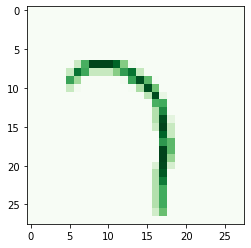

In [62]:
image_index = 3
plt.imshow(X[image_index].reshape(28,28), cmap='Greens')
print(y[image_index])

3


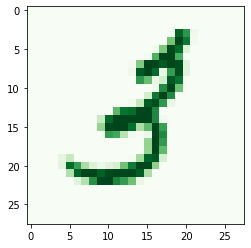

In [63]:
image_index = 29
plt.imshow(X[image_index].reshape(28,28), cmap='Greens')
print(y[image_index])

# Train-Test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

# Normalization


In [27]:
x_train /= 255
x_test /= 255

# Model 


In [28]:
input_shape = (28,28,1)
output_class = 10

In [61]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

## Model Train

In [64]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1149/1149 [==============================] - 11s 9ms/step - loss: 0.2848 - accuracy: 0.9148 - val_loss: 0.1209 - val_accuracy: 0.9632
Epoch 2/50
1149/1149 [==============================] - 9s 8ms/step - loss: 0.1260 - accuracy: 0.9614 - val_loss: 0.0908 - val_accuracy: 0.9714
Epoch 3/50
1149/1149 [==============================] - 9s 8ms/step - loss: 0.0913 - accuracy: 0.9719 - val_loss: 0.0710 - val_accuracy: 0.9766
Epoch 4/50
1149/1149 [==============================] - 9s 8ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 5/50
1149/1149 [==============================] - 10s 8ms/step - loss: 0.0540 - accuracy: 0.9824 - val_loss: 0.0676 - val_accuracy: 0.9811
Epoch 6/50
1149/1149 [==============================] - 9s 8ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.0778 - val_accuracy: 0.9777
Epoch 7/50
1149/1149 [==============================] - 9s 8ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0693 - val_accurac

# Accuracy Graph

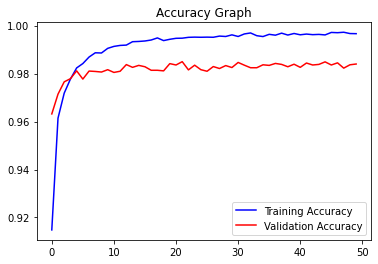

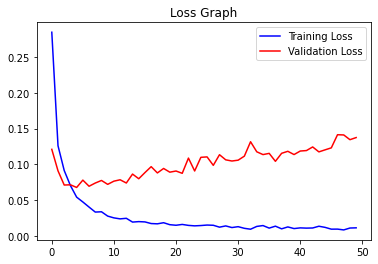

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

# Model Testing


1/1 [==============================] - 0s 17ms/step
Prediction: 7


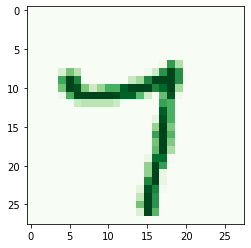

In [75]:
image_index = (random.randint(0,1000))
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greens')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Prediction:", pred.argmax())

1/1 [==============================] - 0s 18ms/step
Prediction: 5


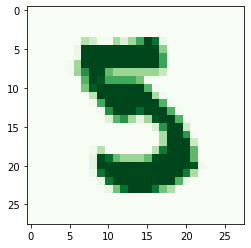

In [76]:
image_index = (random.randint(0,1000))
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greens')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Prediction:", pred.argmax())

1/1 [==============================] - 0s 21ms/step
Prediction: 3


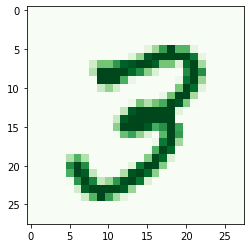

In [81]:
image_index = (random.randint(0,1000))
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greens')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Prediction:", pred.argmax())

In [ ]:
.